In [46]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

%matplotlib inline
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

SyntaxError: invalid syntax (<ipython-input-46-08bf4cf51e10>, line 12)

In [7]:
data = pd.read_csv("/kaggle/input/calcofi/bottle.csv",low_memory=False)
data.shape

(864863, 74)

In [20]:
data.describe()

,Cst_Cnt,Btl_Cnt,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,Oxy_µmol/Kg,BtlNum,...,R_CHLA,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1
count,864863.000000,864863.000000,864863.000000,864863.000000,864863.000000,862703.000000,864863.000000,862703.000000,862703.000000,181096.000000,...,391866.000000,391866.000000,864863.000000,181096.000000,67890.000000,67657.000000,67890.000000,67657.000000,21465.000000,22114.000000
mean,17138.790958,432432.000000,226.831951,10.791383,33.836106,3.016790,25.792270,51.512629,134.079162,9.847324,...,1.307104,0.407979,228.395694,161.653858,2274.325468,2270.105088,2298.599211,2319.759768,7.944048,7.863051
std,10240.949817,249664.587267,316.050259,4.259400,0.469311,2.151036,1.173327,38.439577,94.054620,6.249049,...,3.158518,0.839221,319.456731,85.844622,76.729342,117.094103,36.602003,66.909384,0.011929,0.056699
min,1.000000,1.000000,0.000000,1.440000,28.431000,-0.010000,20.934000,-0.100000,-0.434900,0.000000,...,-0.010000,-3.890000,0.000000,0.000000,1948.850000,1969.440000,2181.570000,2198.150000,7.923100,7.618300
25%,8269.000000,216216.500000,46.000000,7.660000,33.480000,0.740000,24.915000,11.000000,33.468350,5.000000,...,0.010000,0.030000,46.000000,200.000000,2275.470000,2306.700000,2282.280000,2304.740000,7.943200,7.867100
50%,16848.000000,432432.000000,125.000000,10.050000,33.850000,2.810000,25.950000,46.100000,127.981800,9.000000,...,0.090000,0.080000,126.000000,206.000000,2297.130000,2312.940000,2305.960000,2309.570000,7.943200,7.873800
75%,26557.000000,648647.500000,300.000000,13.890000,34.200000,5.340000,26.644000,94.600000,233.969000,15.000000,...,0.400000,0.240000,302.000000,213.000000,2313.580000,2319.330000,2314.740000,2318.870000,7.950100,7.873800
max,34404.000000,864863.000000,5351.000000,31.140000,37.034000,11.130000,250.784000,214.100000,485.701800,25.000000,...,66.110000,65.300000,5458.000000,424.000000,2367.800000,2364.420000,2434.900000,2437.000000,7.988300,8.047700


In [32]:
data = data.fillna(method='ffill')
data.columns

Index(['Cst_Cnt', 'Btl_Cnt', 'Sta_ID', 'Depth_ID', 'Depthm', 'T_degC',
       'Salnty', 'O2ml_L', 'STheta', 'O2Sat', 'Oxy_µmol/Kg', 'BtlNum',
       'RecInd', 'T_prec', 'T_qual', 'S_prec', 'S_qual', 'P_qual', 'O_qual',
       'SThtaq', 'O2Satq', 'ChlorA', 'Chlqua', 'Phaeop', 'Phaqua', 'PO4uM',
       'PO4q', 'SiO3uM', 'SiO3qu', 'NO2uM', 'NO2q', 'NO3uM', 'NO3q', 'NH3uM',
       'NH3q', 'C14As1', 'C14A1p', 'C14A1q', 'C14As2', 'C14A2p', 'C14A2q',
       'DarkAs', 'DarkAp', 'DarkAq', 'MeanAs', 'MeanAp', 'MeanAq', 'IncTim',
       'LightP', 'R_Depth', 'R_TEMP', 'R_POTEMP', 'R_SALINITY', 'R_SIGMA',
       'R_SVA', 'R_DYNHT', 'R_O2', 'R_O2Sat', 'R_SIO3', 'R_PO4', 'R_NO3',
       'R_NO2', 'R_NH4', 'R_CHLA', 'R_PHAEO', 'R_PRES', 'R_SAMP', 'DIC1',
       'DIC2', 'TA1', 'TA2', 'pH2', 'pH1', 'DIC Quality Comment'],
      dtype='object')

In [52]:
X = data[['Depthm', 'T_degC','R_Depth', 'R_TEMP', 'R_POTEMP', 'R_SALINITY', 'R_SIGMA','pH2', 'pH1']]
X = X.fillna(method='bfill')
y = data["Salnty"].values

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [54]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [55]:
print(regressor.intercept_)
print(regressor.coef_)

0.043474802298099746
[ 1.83394051e-02 -1.45282326e-02 -1.83246382e-02  1.54586712e-02
  9.57197346e-04  9.72871839e-01  1.14493986e-02  5.30239836e-02
  1.67405494e-02]


In [56]:
y_pred = regressor.predict(X_test)

In [57]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,33.6720,33.671454
1,33.7380,33.738311
2,34.0000,33.991888
3,34.0250,34.023260
4,33.3260,33.332223
5,34.5800,34.570682
6,34.2060,34.203230
7,33.3220,33.331180
8,34.1800,34.175207
9,33.5960,33.600160


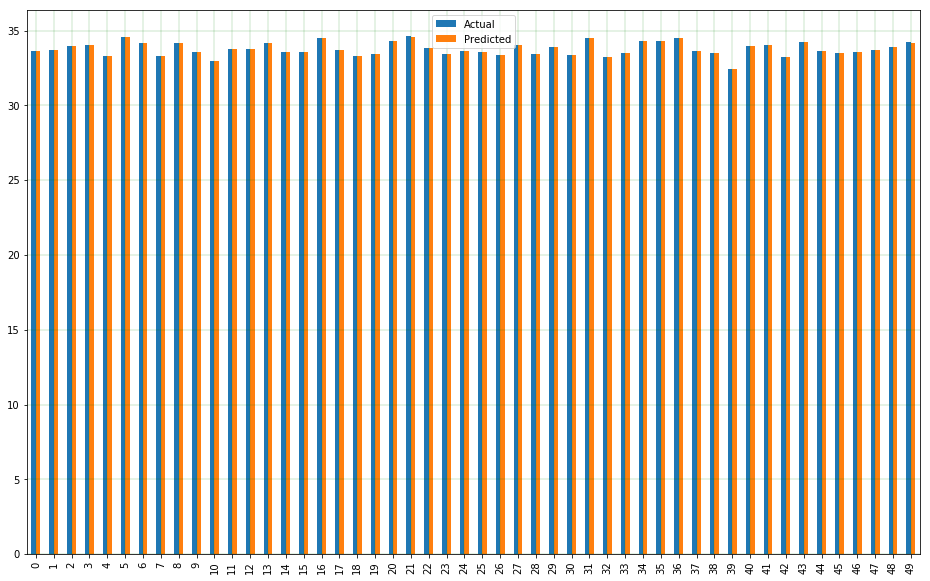

In [58]:
df1 = df.head(50)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.2', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.2', color='black')
plt.show()

In [60]:
print('Mean Absolute Error :', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error : ', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error : 0.005268250954135826
Mean Squared Error :  0.00010724462943531617
Root Mean Squared Error :  0.010355898292051548
